In [2]:
# importing dependencies
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [31]:
# a global function to calculate the distance
def eucledian_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

# class of K-means cluster
class ScratchKMeans():
    def __init__(self, k=5, max_iters=100, verbose=False):
        self.k = k
        self.max_iters = max_iters
        self.verbose = verbose
        
        # initializing an empty list of sample indeces for each cluster
        self.clusters = [[] for _ in range(self.k)]
        
        # a list to store the mean of feature vector 
        self.centroids = []
    
    def fit(self, X):
        if self.verbose:
            print()
        return
    
    def predict(self,X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # initialize the centroids
        random_samples_idxs = np.random.choice(self.n_samples, self.k, replace=False)
        self.centroids = [self.X[idx] for idx in random_samples_idxs]
        
        # optimization
        for _ in range(self.max_iters):
            # update cluster
            self.clusters = self._create_clusters(self.centroids)
            
            # update centroids
            # store old centroids
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            # check for if the centroids are not changing anymore(and stop)
            if self._is_converged(centroids_old, self.centroids):
                break
        return self._get_cluster_labels(self.clusters)
    
    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.k)]
        for idx, sample in enumerate(self.X):
            # getting closest centroids index
            centroids_idx = self._closest_centroid(sample, centroids)
            clusters[centroids_idx].append(idx)
        return clusters
    
    def _closest_centroid(self, sample, centroids):
        # calc distance of all samples to the centroids
        distances = [eucledian_distance(sample,point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx
    
    def _get_centroids(self,clusters):
        centroids = np.zeros((self.k, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    
    def _is_converged(self, centroids_old, centroids):
        distances = [eucledian_distance(centroids_old[i], centroids[i]) for i in range(self.k)]
        return sum(distances) == 0
    
    def _get_cluster_labels(self,clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx,cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels
    
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)

        plt.show()

In [4]:
# splitting our dataset
X,_ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

### [Problem 1] Determine the initial value of the center point

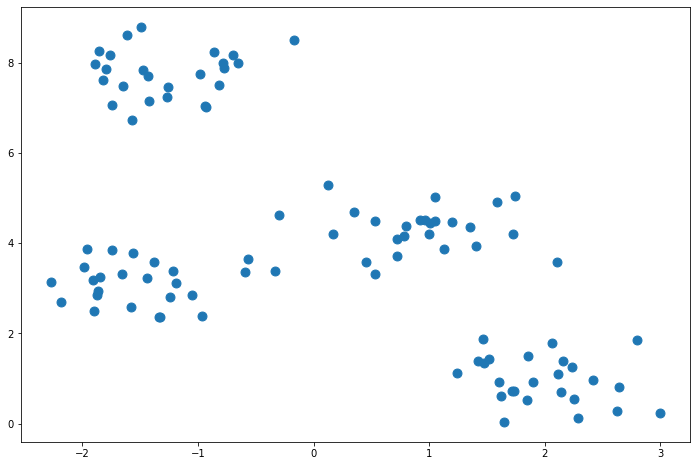

In [5]:
# visualize the dataset
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.scatter(X[:,0],X[:,1],s=80);

In [6]:
k = 4
center_points = X[np.random.choice(len(X),size=k,replace=False)]
print("randomly selected center points: ", center_points)

randomly selected center points:  [[-0.96358605  2.37791651]
 [ 2.4198128   0.96215512]
 [-1.37778493  3.58107521]
 [ 1.04829186  5.03092408]]


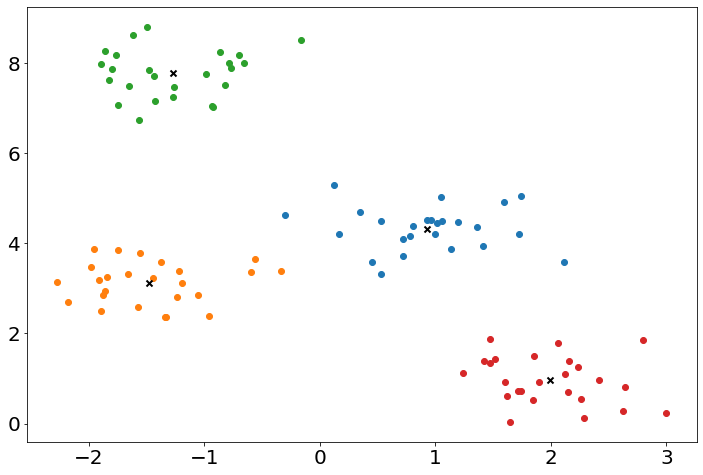

In [37]:
clusters = len(np.unique(_))
k = ScratchKMeans(k=4, max_iters=150, verbose=True)
y_pred = k.predict(X)
k.plot()